In [1]:

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=64,
                    validation_split=0.2)




/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6951 - loss: 0.8497 - val_accuracy: 0.8595 - val_loss: 0.3882
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8407 - loss: 0.4387 - val_accuracy: 0.8713 - val_loss: 0.3387
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8668 - loss: 0.3699 - val_accuracy: 0.8821 - val_loss: 0.3166
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8818 - loss: 0.3219 - val_accuracy: 0.8919 - val_loss: 0.2837
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8962 - loss: 0.2909 - val_accuracy: 0.9020 - val_loss: 0.2621
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9028 - loss: 0.2722 - val_accuracy: 0.9030 - val_loss: 0.2669
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9056 - loss: 0.2577 - val_accuracy: 0.9024 - val_loss: 0.2617
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9137 - loss: 0.2396 - val_accuracy: 0.

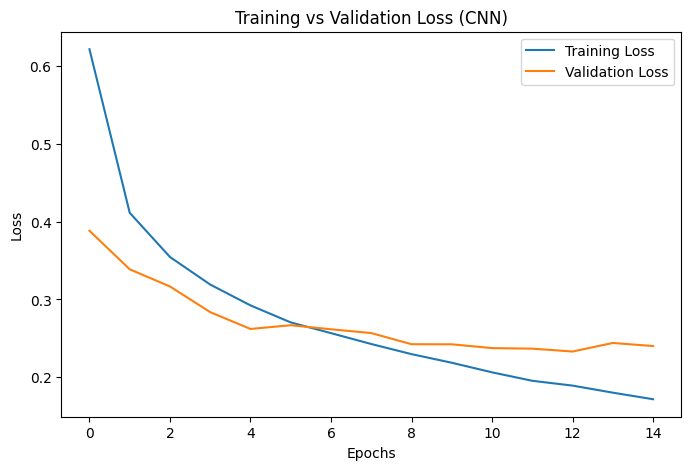

In [2]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss (CNN)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()